<a href="https://colab.research.google.com/github/francusi/CoderDS/blob/main/ProyectoDSParteIBarrionuevo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyecto Final DS
## Entrega N° 1
---

## Abstract

Este proyecto se centra en el análisis exploratorio de los datos de usos del sistema de transporte público SUBE en la ciudad de Rosario, provincia de Santa Fe, utilizando datasets provistos por la entidad SUBE que abarcan los años 2022, 2023 y 2024. Cada dataset contiene aproximadamente 450 mil registros con información detallada sobre cada transacción, incluyendo fecha, empresa, línea, tipo de transporte, jurisdicción y cantidad de usos.

El objetivo principal es explorar y comprender los patrones de uso del transporte público en Rosario a través de un análisis descriptivo y temporal. Se buscará identificar tendencias en la cantidad de pasajeros a lo largo del tiempo (diaria y mensualmente), analizar la distribución de usos por línea y empresa, y detectar posibles patrones estacionales o cambios significativos en la demanda.

Este análisis resulta especialmente relevante en el contexto actual, donde la movilidad urbana constituye un eje central para la planificación de políticas públicas, la asignación de recursos y la mejora en la experiencia de los usuarios. Conocer cómo se comporta la demanda del transporte público permite identificar horarios de mayor carga, líneas con mayor participación relativa y posibles desequilibrios entre oferta y demanda.

Para llevar adelante este estudio se aplicarán técnicas de análisis univariado, bivariado y multivariado, apoyadas en resúmenes numéricos y visualizaciones interactivas. Se emplearán librerías de Python como pandas, Matplotlib, Seaborn y Plotly para garantizar un enfoque claro y didáctico en la exploración de los datos.

En esta primera etapa no se busca generar modelos predictivos, sino sentar las bases para un entendimiento sólido del fenómeno. Los resultados obtenidos constituirán un insumo clave para futuros análisis que podrían incluir predicciones de la demanda, segmentación de empresas y evaluación del impacto de políticas de transporte.

---



## Preguntas / Hipótesis de Interés

1.  ¿Cómo ha evolucionado la cantidad total de usos del transporte público en Rosario a lo largo del tiempo (diario y mensual) entre 2022 y 2024?
2.  ¿Existen patrones estacionales o tendencias claras en el uso del transporte público (por ejemplo, diferencias entre días de semana y fines de semana, o variaciones a lo largo de los meses/años)?
3.  ¿Cuáles son las líneas y empresas de transporte con mayor volumen de usos en Rosario?
4.  ¿Varía la distribución de usos entre líneas y empresas a lo largo del tiempo?
5.  Un pequeño subconjunto de líneas de transporte concentra la mayor parte de los usos totales en la ciudad.








## Objetivo del Proyecto

El objetivo principal de este proyecto es realizar un análisis exploratorio y descriptivo de los datos de uso del sistema de transporte público SUBE en la ciudad de Rosario entre 2022 y 2024. Se busca comprender los patrones de comportamiento de los usuarios, identificar tendencias temporales (diarias, mensuales y anuales), analizar la distribución de usos por líneas y empresas, y validar o refutar las hipótesis planteadas. Este análisis proporcionará una base sólida para entender la dinámica del transporte público en la región y podrá servir como punto de partida para estudios más avanzados, como la optimización de rutas o la planificación de servicios.


---



In [20]:
# Carga de datasets SUBE desde mi repositorio google drive (2022, 2023, 2024)

from google.colab import drive
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

drive.mount('/content/drive')

# Rutas a los archivos
base_path = "/content/drive/MyDrive/CURSOS/DS1-CD/Datasets/"
files = {
    "2022": base_path + "dat-sube-usos-2022.csv",
    "2023": base_path + "dat-sube-usos-2023.csv",
    "2024": base_path + "dat-sube-usos-2024.csv",
}

# Leo datasets y guardo en un diccionario
dfs = {}
for year, path in files.items():
    dfs[year] = pd.read_csv(path)
    dfs[year]["anio"] = int(year)  # agregar columna de año como indice

# Unimos todo en un solo DataFrame
df = pd.concat(dfs.values(), ignore_index=True)
print("Tamaño del dataset:", df.shape)
df.head()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Tamaño del dataset: (1416304, 11)


,DIA_TRANSPORTE,NOMBRE_EMPRESA,LINEA,AMBA,TIPO_TRANSPORTE,JURISDICCION,PROVINCIA,MUNICIPIO,CANTIDAD,DATO_PRELIMINAR,anio
0,2022-01-01,MUNICIPALIDAD DE MERCEDES PROVINCIA DE BUENOS ...,1,SI,COLECTIVO,MUNICIPAL,BUENOS AIRES,MERCEDES,10,NO,2022
1,2022-01-01,MUNICIPALIDAD DE MERCEDES PROVINCIA DE BUENOS ...,2B,SI,COLECTIVO,MUNICIPAL,BUENOS AIRES,MERCEDES,19,NO,2022
2,2022-01-01,EMPRESA BATAN S.A.,BS_AS_LINEA 715M,NO,COLECTIVO,MUNICIPAL,BUENOS AIRES,GENERAL PUEYRREDON,1418,NO,2022
3,2022-01-01,COMPAÑIA DE TRANSPORTE VECINAL S.A.,BS_AS_LINEA_326,SI,COLECTIVO,PROVINCIAL,BUENOS AIRES,SN,675,NO,2022
4,2022-01-01,EMPRESA DE TRANSPORTE PERALTA RAMOS SACI,BS_AS_LINEA_512,NO,COLECTIVO,MUNICIPAL,BUENOS AIRES,GENERAL PUEYRREDON,1906,NO,2022


In [46]:
# Filtrar por Provincia y Municipio
df_filtrado = df[(df['PROVINCIA'] == 'SANTA FE') & (df['MUNICIPIO'] == 'ROSARIO')].copy()

print("Tamaño del dataset filtrado:", df_filtrado.shape)

df_filtrado.head()

Tamaño del dataset filtrado: (27693, 11)


,DIA_TRANSPORTE,NOMBRE_EMPRESA,LINEA,AMBA,TIPO_TRANSPORTE,JURISDICCION,PROVINCIA,MUNICIPIO,CANTIDAD,DATO_PRELIMINAR,anio
487365,2023-02-10,MOVI ROSARIO S.A.U,LINEA_115,NO,COLECTIVO,MUNICIPAL,SANTA FE,ROSARIO,28,NO,2023
489621,2023-02-12,MOVI ROSARIO S.A.U,LINEA_115,NO,COLECTIVO,MUNICIPAL,SANTA FE,ROSARIO,3,NO,2023
490839,2023-02-13,MOVI ROSARIO S.A.U,LINEA_115,NO,COLECTIVO,MUNICIPAL,SANTA FE,ROSARIO,1,NO,2023
509121,2023-02-28,MOVI ROSARIO S.A.U,LINEA_112,NO,COLECTIVO,MUNICIPAL,SANTA FE,ROSARIO,1,NO,2023
509122,2023-02-28,MOVI ROSARIO S.A.U,LINEA_115_AEROPUERTO,NO,COLECTIVO,MUNICIPAL,SANTA FE,ROSARIO,1,NO,2023


## Missing Values

Con este codigo identificamos y mostramos si existen valores faltantes en cada columna del dataframe

In [64]:
missing = df_filtrado.isna().sum().sort_values(ascending=False)
missing[missing > 0]

,0


Observado el resultado podemos ver que no existen valores faltantes en nuestro df.


In [48]:
# Convertimos 'DIA_TRANSPORTE' a datetime
df_filtrado['DIA_TRANSPORTE'] = pd.to_datetime(df_filtrado['DIA_TRANSPORTE'])

# Verificamos que DIA_TRANSPORTE se encuentre en formato datetime
print(df_filtrado.info())

<class 'pandas.core.frame.DataFrame'>
Index: 27693 entries, 487365 to 1416223
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   DIA_TRANSPORTE   27693 non-null  datetime64[ns]
 1   NOMBRE_EMPRESA   27693 non-null  object        
 2   LINEA            27693 non-null  object        
 3   AMBA             27693 non-null  object        
 4   TIPO_TRANSPORTE  27693 non-null  object        
 5   JURISDICCION     27693 non-null  object        
 6   PROVINCIA        27693 non-null  object        
 7   MUNICIPIO        27693 non-null  object        
 8   CANTIDAD         27693 non-null  int64         
 9   DATO_PRELIMINAR  27693 non-null  object        
 10  anio             27693 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(8)
memory usage: 3.5+ MB
None


## Evolución Diaria de Usos

Calculamos la cantidad total de usos por día y visualizamos.

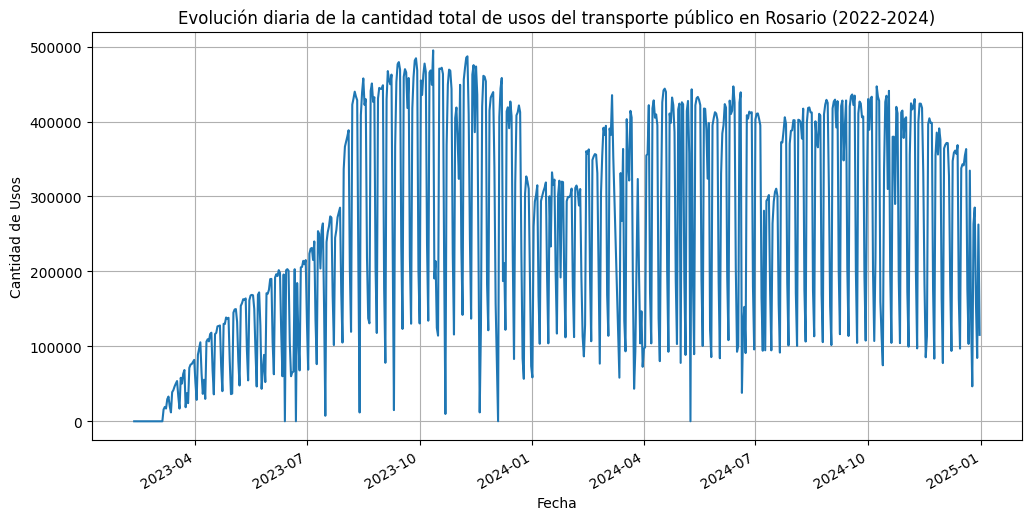

In [49]:
# Agrupamos por dia y cantidad de usos diarios
usos_diarios = df_filtrado.groupby('DIA_TRANSPORTE')['CANTIDAD'].sum()

# Grafico usos por dia
plt.figure(figsize=(12, 6))
usos_diarios.plot()
plt.title('Evolución diaria de la cantidad total de usos del transporte público en Rosario (2022-2024)')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de Usos')
plt.grid(True)
plt.show()

En base al analsis anterior, vamos a verificar si existen datos en el año 2022 para la ciudad de Rosario.

In [50]:
# Filtramos por el año y guardamos
usos_diarios_2022 = usos_diarios[usos_diarios.index.year == 2022]

# Imprimimos un mensaje con el resultado
if usos_diarios_2022.empty:
    print("No existen datos de usos diarios para el año 2022 en el dataset filtrado.")
else:
    print("Existen datos de usos diarios para el año 2022 en el dataset filtrado. Primeras filas:")
    display(usos_diarios_2022.head())

No existen datos de usos diarios para el año 2022 en el dataset filtrado.


## Evolución Mensual de Usos

Calculamos la cantidad total de usos por mes y visualizamos.

Usos mensuales:


,CANTIDAD
DIA_TRANSPORTE,
2023 - 02,40
2023 - 03,1133528
2023 - 04,2738477
2023 - 05,3887337
2023 - 06,4423963
2023 - 07,6451874
2023 - 08,10683211
2023 - 09,10945008
2023 - 10,10773448


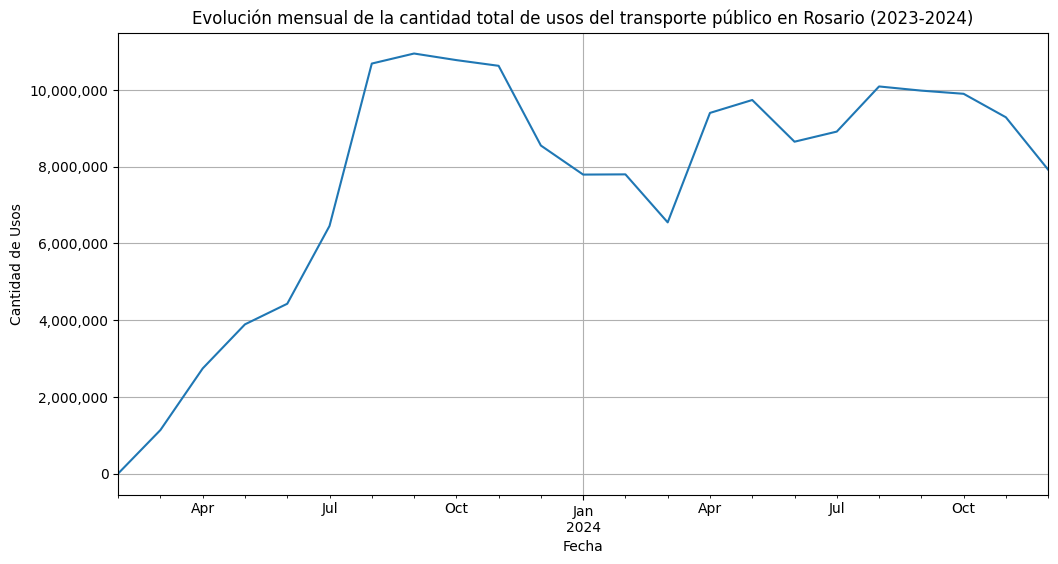

In [51]:
import locale
import matplotlib.ticker as mticker

# Resampleo de datos de usos diarios a usos mensual y sumamos
usos_mensuales = usos_diarios.resample('ME').sum()

# Formateamos a 'YYYY - MM' para mostrar en tabla
usos_mensuales_tabla = usos_mensuales.copy()
usos_mensuales_tabla.index = usos_mensuales_tabla.index.strftime('%Y - %m')

print("Usos mensuales:")
display(usos_mensuales_tabla)

# Grafico de usos por mes
plt.figure(figsize=(12, 6))
ax = usos_mensuales.plot()
plt.title('Evolución mensual de la cantidad total de usos del transporte público en Rosario (2023-2024)')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de Usos')
plt.grid(True)

# Formateamos eje y para que se vean mejor los numeros
formatter = mticker.StrMethodFormatter('{x:,.0f}')
ax.yaxis.set_major_formatter(formatter)

plt.show()

## Análisis por Línea y Empresa

Identificamos las líneas y empresas de transporte con mayor volumen de usos en Rosario y analizamos su distribución.

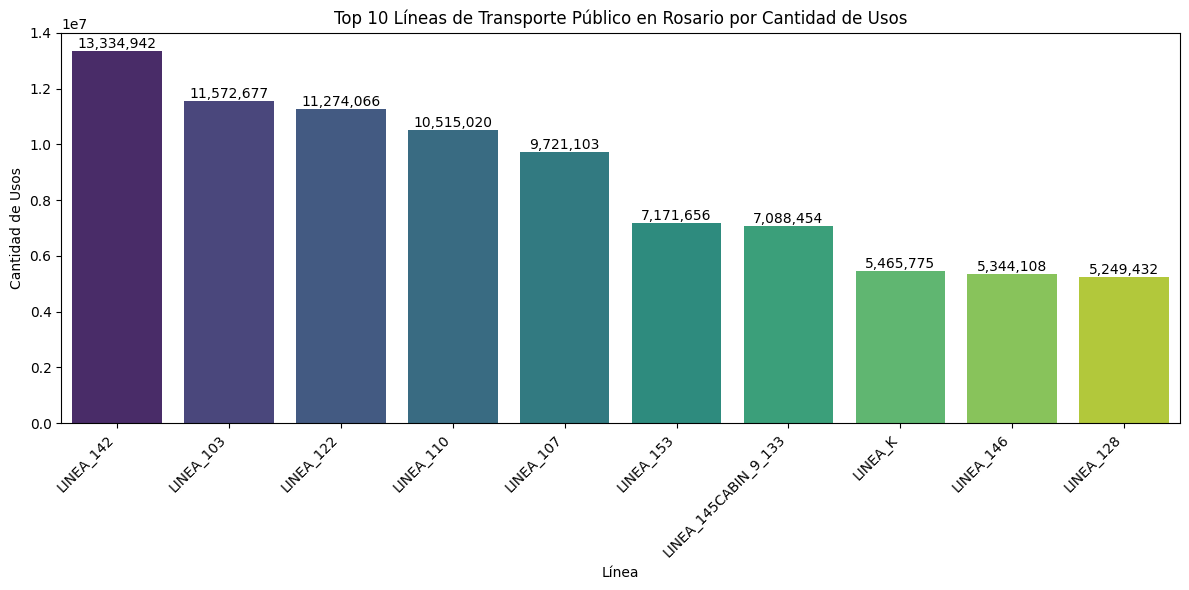


 Usos por Empresa:


,CANTIDAD
NOMBRE_EMPRESA,
ROSARIO BUS S.A,112.091.140
MOVI ROSARIO S.A.U,64.099.957


In [62]:
# Agrupamos por linea, sumamos los usos y ordenamos por orden descendente
usos_por_linea = df_filtrado.groupby('LINEA')['CANTIDAD'].sum().sort_values(ascending=False)

# Seleccionamos top 10 lineas mas usadas
top_10_lineas = usos_por_linea.head(10)

# Graficamos top 10 mediante grafico de barras
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=top_10_lineas.index, y=top_10_lineas.values, hue=top_10_lineas.index, palette='viridis', legend=False) # Updated for FutureWarning
plt.title('Top 10 Líneas de Transporte Público en Rosario por Cantidad de Usos')
plt.xlabel('Línea')
plt.ylabel('Cantidad de Usos')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Añadimos valores a las barras y configuramos separador de miles
for container in ax.containers:
    ax.bar_label(container, fmt='{:,.0f}')
plt.show()

# Agrupamos por empresa y sumamos usos
usos_por_empresa = df_filtrado.groupby('NOMBRE_EMPRESA')['CANTIDAD'].sum().sort_values(ascending=False)
print("\n Usos por Empresa:")
display(usos_por_empresa.apply(lambda x: f"{x:,.0f}".replace(",", ".")))